## Project Case Scenario

# Data Scientist with a housing agency in Boston MA
by DCCM 


## TASK 4

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


**For the "Median value of owner-occupied homes" provide a boxplot**

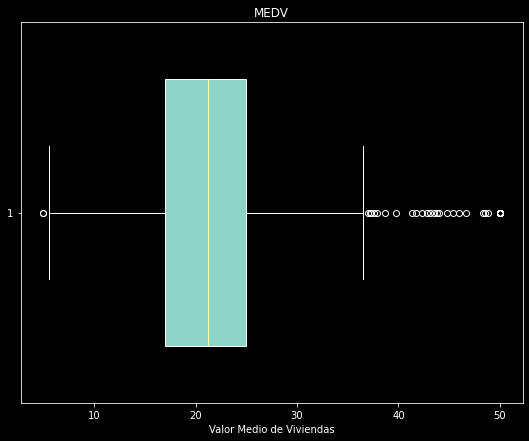

In [7]:
# Diagrama de caja para el valor medio de las viviendas
plt.figure(figsize=(9, 7))
plt.boxplot(boston_df['MEDV'], vert=False, widths=0.7, patch_artist=True)
plt.title('MEDV')
plt.xlabel('Valor Medio de Viviendas')
plt.show()


Bio: The central 50% of the data is contained within the box. 

Middle line: The median mean, data that divides the data into equal parts.

Circles out: House price outliers.


**Provide a  bar plot for the Charles river variable.**

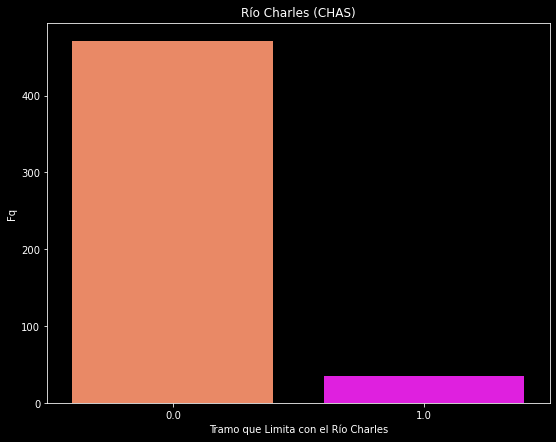

In [11]:
import seaborn as sns

plt.figure(figsize=(9, 7))
sns.countplot(x='CHAS', data=boston_df, palette=['coral', 'fuchsia'])
plt.title('Charles River (CHAS)')
plt.xlabel('Section Bordering the Charle River')
plt.ylabel('Fq')
plt.show()

#donde 0 no limita y 1 si limita con el río

**Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

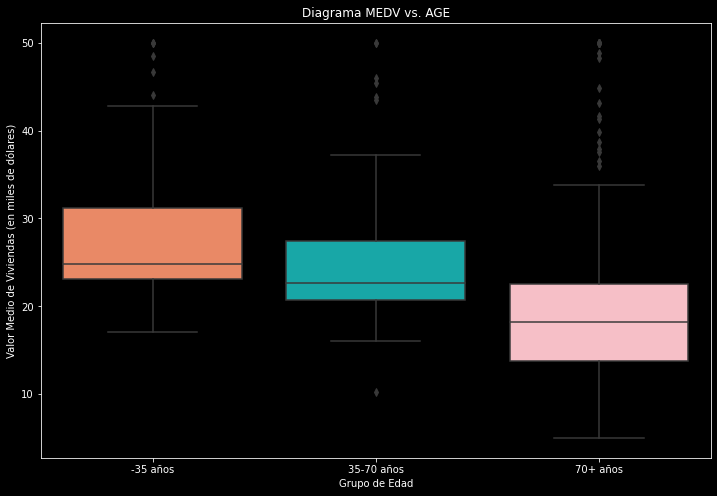

In [17]:
# Discretize the age variable into three groups 
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['-35 años', '35-70 años', '70+ años'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette=['coral',"c","lightpink"])
plt.title('Diagrama MEDV vs. AGE')
plt.xlabel('Age group')
plt.ylabel('Median Home Value (in thousands of dollars)')
plt.show()

**Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

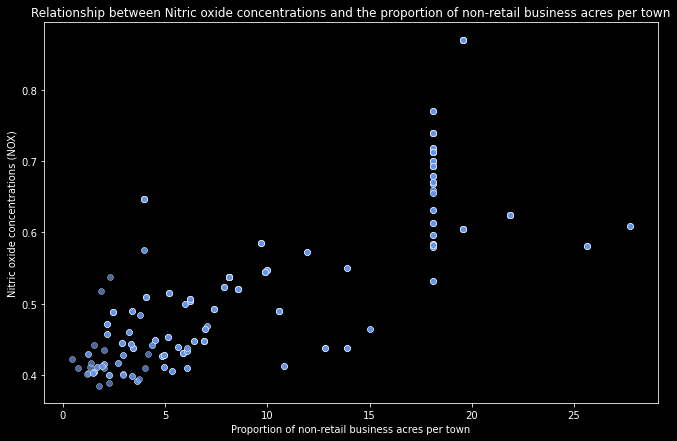

In [24]:
plt.figure(figsize=(11, 7))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.7, color='cornflowerblue')
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentrations (NOX)')
plt.show()

We can see that the points are concentrated in the lower left quadrant, the negative relationship could indicate that areas with more commercial activities have lower concentrations of nitric oxides.

**Create a histogram for the pupil to teacher ratio variable**

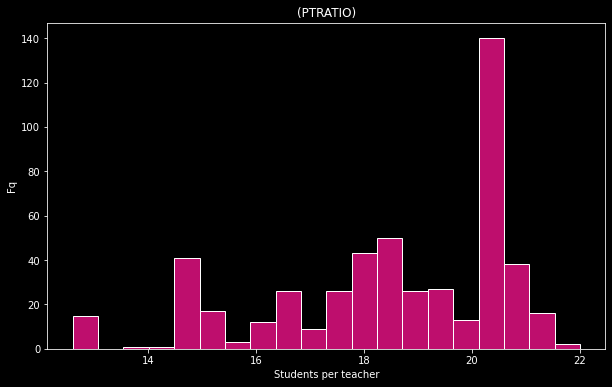

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False, color='deeppink')
plt.title('(PTRATIO)')
plt.xlabel('Students per teacher')
plt.ylabel('Fq')
plt.show()

## TASK 5

1. State your hypothesis.

2. Use α = 0.05

3. Perform the test Statistics.

4. State the conclusion from the test.

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

Hypothesis: 

Null H: There's no significant difference

Other H: There's a significant difference 

In [34]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_a'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_a'] = 'NEAR'

In [35]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group,CHAS_T,CHAS_a
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35-70 años,FAR,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70+ años,FAR,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35-70 años,FAR,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35-70 años,FAR,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35-70 años,FAR,FAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,35-70 años,FAR,FAR
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70+ años,FAR,FAR
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70+ años,FAR,FAR
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70+ años,FAR,FAR


In [37]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

P-value is less than 0.05, we reject the Null Hypothesis there is no significant difference.

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**


Hypothesis: 

Null H: There's no statistical difference

Other H: There's a statistical difference 

In [39]:
var = ols('MEDV ~ AGE', data = boston_df).fit()
ejj = sm.stats.anova_lm(var)
print(ejj)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


P-value is less than 0.05 so there is statistical difference.

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

A Hypothesis: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [40]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209161, 7.913361061230596e-98)

The Pearson Coefficient is 0.76365 and p-value less than 0.05 so we reject the Null Hypothesis as there is a positive correlation.

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [41]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

modelillo = sm.OLS(y, X).fit()
pred_mod = modelillo.predict(X)

modelillo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        19:15:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the results we can say that a one-unit increase in the weighted distance to the 5 employment centers in Boston is associated with an increase of 1.0916 in the median value of owner-occupied homes.